In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import requests
import csv

def openURL(url):
    headers = {'Accept': 'text/plain'}
    r = requests.get(url, headers=headers)

    return np.loadtxt(r.iter_lines())

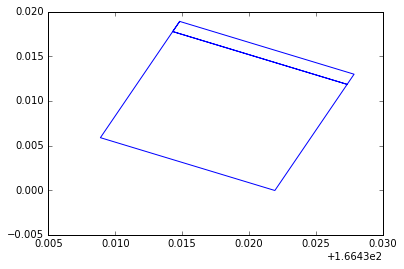

In [28]:
points = openURL("http://localhost/HerschelWs/Api/Observations/PACS/1342211692/Footprint/Outline/Points?res=1")
plot(points[:,0], points[:,1], '-')